[link](https://github.com/DataTalksClub/machine-learning-zoomcamp/blob/master/cohorts/2023/02-regression/homework.md) to homework assignment
[link](https://github.com/wgb-10/ML-Zoomcamp-2022/blob/main/Session-Projects/02-Regression/my-notebook.ipynb) to notes


In [20]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [15]:
df = pd.read_csv('./data/housing.csv')

In [5]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


<Axes: ylabel='Frequency'>

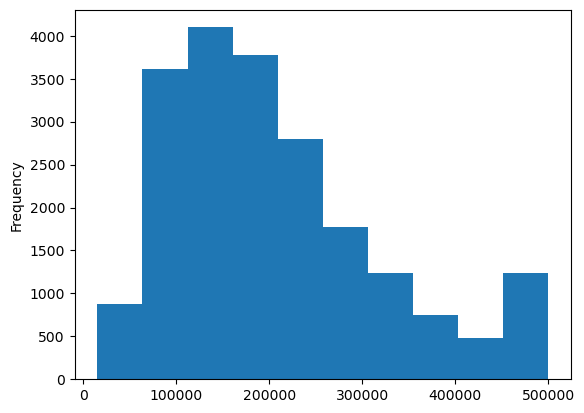

In [7]:
# does median_house_value have a long tail?
#yes it's skewed right

(
    df
    .loc[:,'median_house_value']
    .plot(kind='hist')
)

In [8]:
# does median_house_value have a long tail?
#yes it's skewed right

(
    df
    .loc[:,'median_house_value']
    .skew()
)

0.9777632739098341

In [16]:
#data set prep

df = (
    df
    .query("ocean_proximity.isin(['<1H OCEAN','INLAND'])")
    .loc[:,['latitude','longitude','housing_median_age','total_rooms','total_bedrooms','population','households','median_income','median_house_value']]
)

In [17]:
df.head()

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
701,37.64,-121.97,32.0,1283.0,194.0,485.0,171.0,6.0574,431000.0
830,37.61,-121.99,9.0,3666.0,711.0,2341.0,703.0,4.6458,217000.0
859,37.57,-121.97,21.0,4342.0,783.0,2172.0,789.0,4.6146,247600.0
860,37.58,-121.96,15.0,3575.0,597.0,1777.0,559.0,5.7192,283500.0
861,37.58,-121.98,20.0,4126.0,1031.0,2079.0,975.0,3.6832,216900.0


In [18]:
#Question 1
#which feature has missing values?
(
    df
    .isna()
    .sum()
)

latitude                0
longitude               0
housing_median_age      0
total_rooms             0
total_bedrooms        157
population              0
households              0
median_income           0
median_house_value      0
dtype: int64

In [19]:
#question 2
#median of population
(
    df
    .dropna()
    .loc[:,'population']
    .median()
)

1194.0

In [ ]:
#prepare and split the dataset

X_train, X_test, y_train, y_test = train_test_split(